# Visualization : Cam EigenCam GradCam

In [1]:
from cams.vCam import CAM
from cams.eigenCam import EigenCAM
from cams.gradCam import GradCAM
from utils.image import get_img_list_raf, img_to_input_tensor, pp_images, pp_blended_heatmaps

## Parameters

In [11]:
MODEL_NAME = 'FERplus-impr-std_0124-1040_weights.h5'
LAST_CONV_NAME = 'block3_conv3'

IMG_SHAPE = (100,100,3)

emotion = 'Happiness'
num_imgs = 200

## Input Images

In [12]:
img_list = get_img_list_raf(emotion, num_imgs)
img_tensors = img_to_input_tensor(img_list, IMG_SHAPE)
#pp_images(img_tensors)

## CAM

In [13]:
vis_CAM = CAM(MODEL_NAME, LAST_CONV_NAME, IMG_SHAPE)
img_tensors_not_rgb = img_to_input_tensor(img_list, IMG_SHAPE, RGB=False)
heatmap_CAM, pred_CAM = vis_CAM.get_CAM(img_tensors_not_rgb)

2022-01-27 09:27:10.078834: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


## GradCam

In [14]:
vis_GradCam = GradCAM(MODEL_NAME, LAST_CONV_NAME, IMG_SHAPE)
heatmap_GradCam, pred_GradCam = vis_GradCam.get_CAM(img_tensors)

2022-01-27 09:27:11.980088: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


## EigenCam

In [15]:
vis_EigenCam = EigenCAM(MODEL_NAME, LAST_CONV_NAME, IMG_SHAPE)
heatmap_EigenCam, pred_EigenCam = vis_EigenCam.get_CAM(img_tensors)

2022-01-27 09:27:21.600196: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-27 09:27:22.827212: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


## Result

### blended

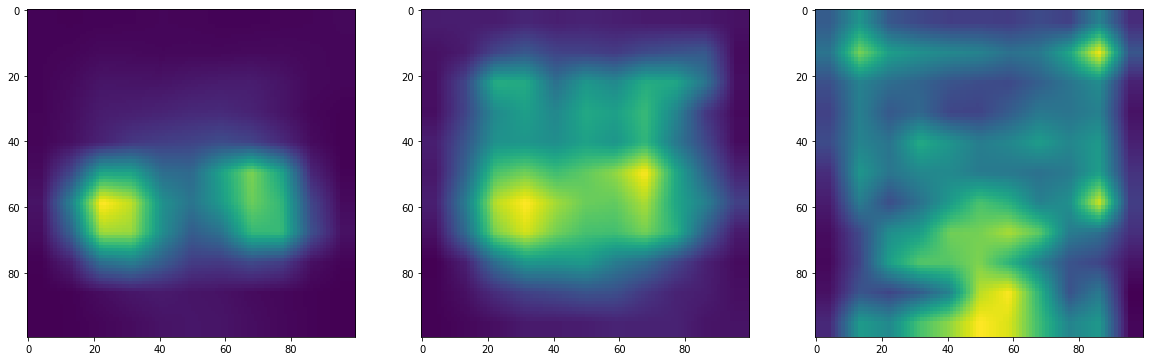

In [16]:
pp_blended_heatmaps([heatmap_CAM,heatmap_EigenCam,heatmap_GradCam])

### Cam

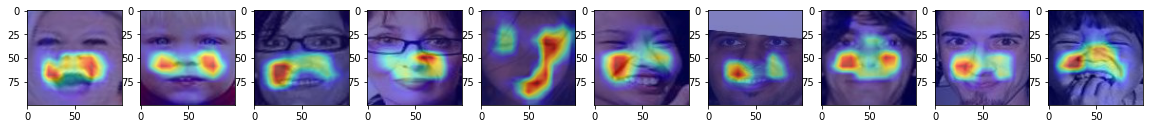

In [8]:
pp_images(img_tensors, heatmap_CAM)

### EigenCam

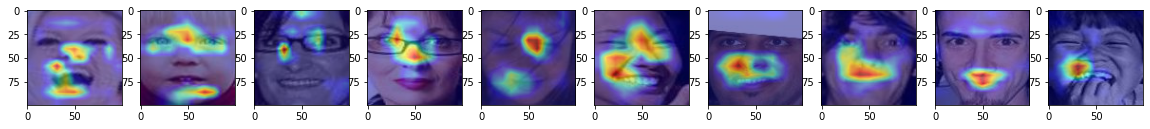

In [9]:
pp_images(img_tensors, heatmap_EigenCam)

### GradCam

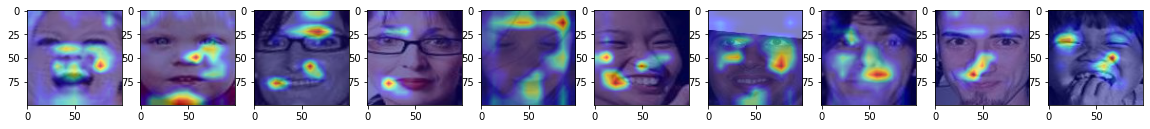

In [10]:
pp_images(img_tensors, heatmap_GradCam)